In [1]:
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt
from matplotlib import colors as c
import sys, getopt
import time
from joblib import Parallel, delayed
#from skimage import measure
from mpl_toolkits.mplot3d import Axes3D
sys.path.append('/home/german/kameleon/lib/python2.7/site-packages/ccmc/')
import _CCMC as ccmc
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
import plotly.tools as tls
from plotly.tools import FigureFactory as FF
from IPython.core.display import display, HTML
import pandas as pd
def interpol_data(variable,x,y,z):
    npts = x.size
    data = np.zeros(npts)
    for j in range(npts):
        data[j] = interpolator.interpolate(variable, x[j], y[j], z[j])
    return data 

In [2]:
# input parameters for topology function, filename and seed position
filename=['./3d__ful_1_t00002245_n0046008.out.cdf','./3d__ful_1_t00002345_n0048526.out.cdf',
          './3d__ful_1_t00002415_n0049796.out.cdf','./3d__ful_1_t00002530_n0053075.out.cdf']

xmin = 8.2;xmax = 8.85;
ymin = -7;ymax = 7;
zmin = -2.5;zmax = 2.5;
#dx=.2; dy=.4; dz=.4; #test
dx=.01; dy=.01; dz=.01;
#x,z = np.mgrid[xmin:xmax:dx,zmin:zmax:dz]
x,z=np.meshgrid(np.arange(xmin, xmax, dx), np.arange(zmin, zmax, dz))
xv = np.reshape(x,[np.product(x.shape)])
yv = 0*np.ones(np.product(x.shape))
zv = np.reshape(z,[np.product(z.shape)])

nx=2;ny=2;nz=8
xa,za = np.mgrid[xmin:xmax:dx*nx,zmin:zmax:dz*nz]
xav = np.reshape(xa,[np.product(xa.shape)])
yav = 0*np.ones(np.product(xa.shape))
zav = np.reshape(za,[np.product(za.shape)])

p=[]
bx=[]
by=[]
bz=[]
bxav=[]
byav=[]
bzav=[]
for j in range(4):
    kameleon = ccmc.Kameleon() 
    pzv = np.zeros(np.product(x.shape))
    kameleon.open(filename[j])
    kameleon.loadVariable('b')
    kameleon.loadVariable('p')
    interpolator = kameleon.createNewInterpolator()
    pv = interpol_data('p',xv,yv,zv)
    bxv = interpol_data('bx',xv,yv,zv)
    byv = interpol_data('by',xv,yv,zv)
    bzv = interpol_data('bz',xv,yv,zv)
    p.append(np.reshape(pv,x.shape))
    bx.append(np.reshape(bxv,x.shape))
    by.append(np.reshape(byv,x.shape))
    bz.append(np.reshape(bzv,x.shape))
    bxav.append(interpol_data('bx',xav,yav,zav))
    byav.append(interpol_data('by',xav,yav,zav))
    bzav.append(interpol_data('bz',xav,yav,zav))
    for i in range(bxav[j].shape[0]):
        b_abs = np.sqrt(bxav[j][i]**2+bzav[j][i]**2)
        bxav[j][i]=bxav[j][i]/b_abs
        bzav[j][i]=bzav[j][i]/b_abs
kameleon.close()

0L

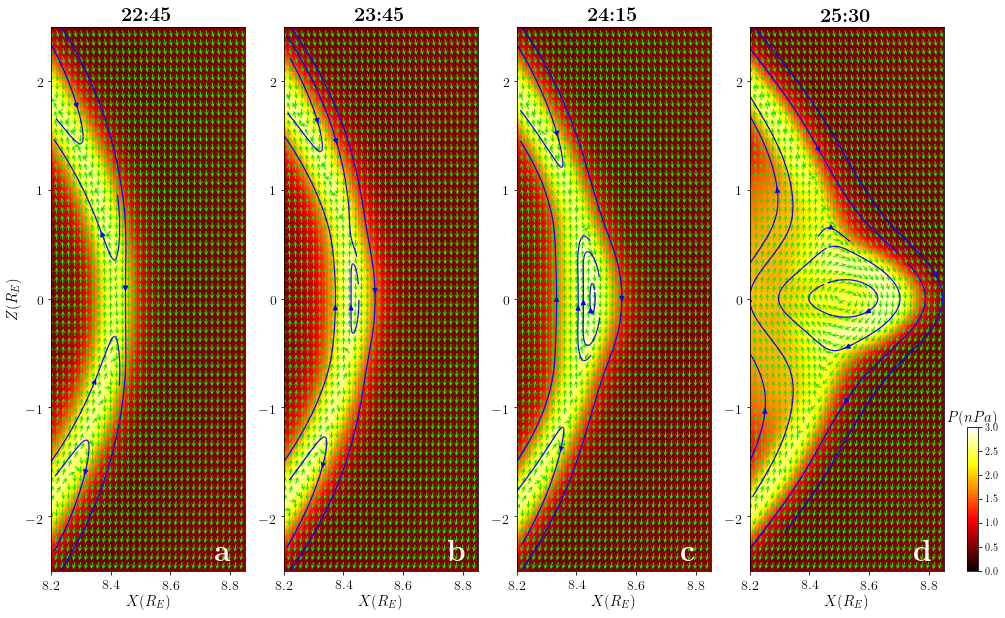

In [4]:
%matplotlib inline
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
fig, ax = plt.subplots(1,4,figsize=(16, 10))
pic = ax[0].pcolormesh(x, z, p[0],cmap='hot',vmin=0,vmax=3)
ax[0].set(xlabel=r'$X(R_E)$', ylabel=r'$Z(R_E)$',title=r'\textit{22:45}')
ax[0].set(xlabel=r'$X(R_E)$', ylabel='')
ax[0].set_xlabel(r'$X(R_E)$', fontsize=15)
ax[0].set_ylabel(r'$Z(R_E)$', fontsize=15)
ax[0].set_title(r'\textbf{22:45}',fontsize=20)
for tick in ax[0].xaxis.get_major_ticks():
                tick.label.set_fontsize(14)
for tick in ax[0].yaxis.get_major_ticks():
                tick.label.set_fontsize(14)
loc = np.arange(0,xav.shape[0],1)
xq = xav[loc]
zq = zav[loc]
bxq = bxav[0][loc]
bzq = bzav[0][loc]

quiv = ax[0].quiver(xq,zq,bxq,bzq,units='width',width=0.0055,headwidth=5,headlength=5,headaxislength=3,scale=27,
                    color=cm.brg(240))
sx = np.array([8.45, 8.44, 8.43, 8.29, 8.32, 8.29,8.22, 8.2, 8.2,8.2])
sz = np.array([0.13, 0.43, 0.57, 1.43, -1.3, -1.45,2.48, 2.43, 1.681,-1.5])
start_points = np.array(np.transpose([sx,sz]))
strm = ax[0].streamplot(x,z,bx[0],bz[0], linewidth=1.2, color='b',integration_direction='both',start_points=start_points)
ax[0].text(8.75, -2.4, r'\textbf{a}', fontsize=30,color='w')
#ax[0].set_xlim(8.2,8.8)

#second pict.
pic = ax[1].pcolormesh(x, z, p[1],cmap='hot',vmin=0,vmax=3)
ax[1].set(xlabel=r'$X(R_E)$', ylabel='')
ax[1].set_xlabel(r'$X(R_E)$', fontsize=15)
ax[1].set_title(r'\textbf{23:45}',fontsize=20)
for tick in ax[1].xaxis.get_major_ticks():
                tick.label.set_fontsize(14)
for tick in ax[1].yaxis.get_major_ticks():
                tick.label.set_fontsize(14)
loc = np.arange(0,xav.shape[0],1)
xq = xav[loc]
zq = zav[loc]
bxq = bxav[1][loc]
bzq = bzav[1][loc]

quiv = ax[1].quiver(xq,zq,bxq,bzq,units='width',width=0.0055,headwidth=5,headlength=5,headaxislength=3,scale=27,
                    color=cm.brg(240))
sx = np.array([8.45, 8.44, 8.43, 8.29, 8.32, 8.29,8.22, 8.2, 8.2,8.2,8.24])
sz = np.array([0.13, 0.43, 0.57, 1.43, -1.3, -1.45,2.48, 2.43, 1.681,-1.5,2.43])
start_points = np.array(np.transpose([sx,sz]))
strm = ax[1].streamplot(x,z,bx[1],bz[1], linewidth=1.2, color='b',integration_direction='both',start_points=start_points)
ax[1].text(8.75, -2.4, r'\textbf{b}', fontsize=30,color='w')
#ax[1].set_xlim(8.2,8.8)

#3rd pict.
pic = ax[2].pcolormesh(x, z, p[2],cmap='hot',vmin=0,vmax=3)
ax[2].set(xlabel=r'$X(R_E)$', ylabel='',title=r'\textit{24:15}')
ax[2].set(xlabel=r'$X(R_E)$', ylabel='')
ax[2].set_xlabel(r'$X(R_E)$', fontsize=15)
ax[2].set_title(r'\textbf{24:15}',fontsize=20)
for tick in ax[2].xaxis.get_major_ticks():
                tick.label.set_fontsize(14)
for tick in ax[2].yaxis.get_major_ticks():
                tick.label.set_fontsize(14)
loc = np.arange(0,xav.shape[0],1)
xq = xav[loc]
zq = zav[loc]
bxq = bxav[2][loc]
bzq = bzav[2][loc]

quiv = ax[2].quiver(xq,zq,bxq,bzq,units='width',width=0.0055,headwidth=5,headlength=5,headaxislength=3,scale=27,
                    color=cm.brg(240))
sx = np.array([8.45, 8.44, 8.43, 8.29, 8.32, 8.29,8.22, 8.2, 8.2,8.2])
sz = np.array([0.13, 0.43, 0.57, 1.43, -1.3, -1.45,2.48, 2.43, 1.681,-1.5])
start_points = np.array(np.transpose([sx,sz]))
strm = ax[2].streamplot(x,z,bx[2],bz[2], linewidth=1.2, color='b',integration_direction='both',start_points=start_points)
ax[2].text(8.75, -2.4, r'\textbf{c}', fontsize=30,color='w')

#4rd pict.
pic = ax[3].pcolormesh(x, z, p[3],cmap='hot',vmin=0,vmax=3)
ax[3].set(xlabel=r'$X(R_E)$', ylabel='',title=r'\textit{25:30}')
ax[3].set(xlabel=r'$X(R_E)$', ylabel='')
ax[3].set_xlabel(r'$X(R_E)$', fontsize=15)
ax[3].set_title(r'\textbf{25:30}',fontsize=20)
for tick in ax[3].xaxis.get_major_ticks():
                tick.label.set_fontsize(14)
for tick in ax[3].yaxis.get_major_ticks():
                tick.label.set_fontsize(14)
loc = np.arange(0,xav.shape[0],1)
xq = xav[loc]
zq = zav[loc]
bxq = bxav[3][loc]
bzq = bzav[3][loc]

quiv = ax[3].quiver(xq,zq,bxq,bzq,units='width',width=0.0055,headwidth=5,headlength=5,headaxislength=3,scale=27,
                    color=cm.brg(240))
sx = np.array([8.45, 8.44, 8.43, 8.29, 8.32, 8.29,8.22, 8.2, 8.2,8.2,8.2,8.2])
sz = np.array([0.13, 0.43, 0.57, 1.43, -1.3, -1.45,2.48, 2.43, 1.681,-1.5,2.3,-2.3])
start_points = np.array(np.transpose([sx,sz]))
strm = ax[3].streamplot(x,z,bx[3],bz[3], linewidth=1.2, color='b',integration_direction='both',start_points=start_points)
ax[3].set_xlim(8.2,8.85)
#cb = fig.colorbar(pic,ax=ax[3], shrink=.3, aspect=20)
#cb.ax.set_title(r'$P(nPa)$')
cbaxes = fig.add_axes([.92, 0.125, 0.01, 0.2])  # This is the position for the colorba
cb = plt.colorbar(pic, cax = cbaxes)
cbaxes.set_title(r'$P(nPa)$',color='k',fontsize= 15,fontweight="bold")
ax[3].text(8.75, -2.4, r'\textbf{d}', fontsize=30,color='w')
fig.savefig("testq.png", dpi = 400)



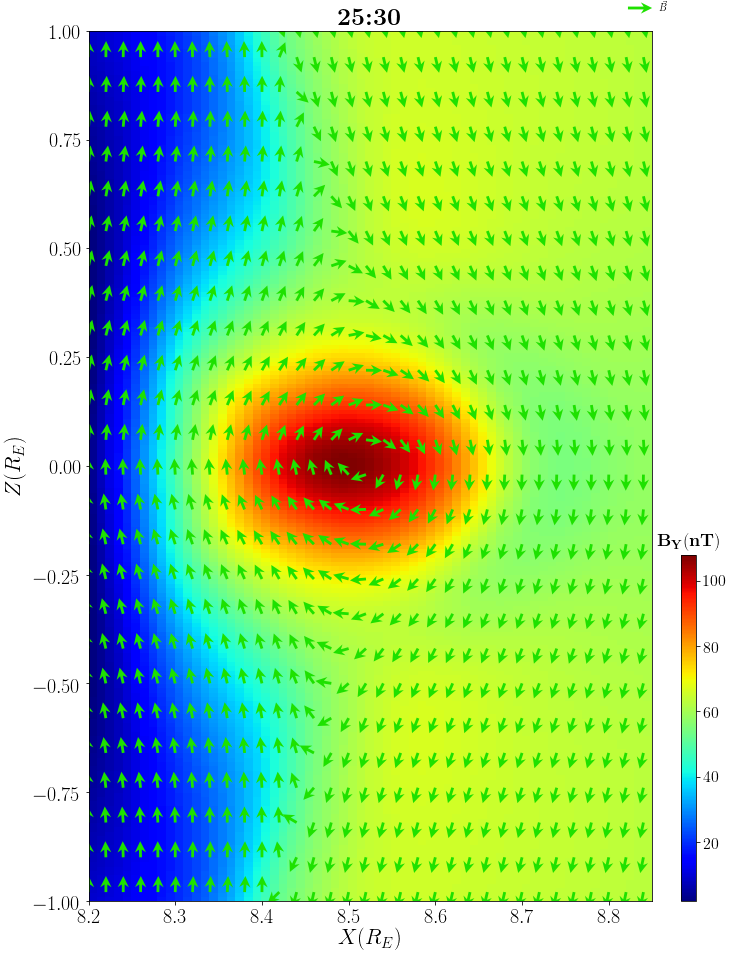

In [5]:
# By picture
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
fig1, ax = plt.subplots(1,1,figsize=(10.1, 16))
pic1 = ax.pcolormesh(x, z, by[3],cmap='jet')#,vmin=0,vmax=3)
ax.set(xlabel=r'$X(R_E)$', ylabel=r'$Z(R_E)$',title=r'\textit{22:45}')
ax.set(xlabel=r'$X(R_E)$', ylabel='')
ax.set_xlabel(r'$X(R_E)$', fontsize=22)
ax.set_ylabel(r'$Z(R_E)$', fontsize=22)
ax.set_title(r'\textbf{25:30}',fontsize=25)
for tick in ax.xaxis.get_major_ticks():
                tick.label.set_fontsize(20)
for tick in ax.yaxis.get_major_ticks():
                tick.label.set_fontsize(20)
loc = np.arange(0,xav.shape[0],1)
xq = xav[loc]
zq = zav[loc]
bxq = bxav[3][loc]
bzq = bzav[3][loc]

quiv = ax.quiver(xq,zq,bxq,bzq,units='width',width=0.005,headwidth=4,headlength=4,headaxislength=3,scale=35,
                    color=cm.brg(240))
sx = np.array([8.45, 8.44, 8.43, 8.29, 8.32, 8.29,8.22, 8.2, 8.2,8.2])
sz = np.array([0.13, 0.43, 0.57, 1.43, -1.3, -1.45,2.48, 2.43, 1.681,-1.5])
start_points = np.array(np.transpose([sx,sz]))
#strm = ax.streamplot(x,z,bx[3],bz[3], linewidth=1.2, color='b',integration_direction='both',start_points=start_points)
#ax.text(8.75, -2.4, r'\textbf{a}', fontsize=30,color='w')
ax.set_xlim(8.2,8.85)
ax.set_ylim(-1,1)
cbaxes1 = fig1.add_axes([.94, 0.125, 0.02, 0.3])  # This is the position for the colorba
cb = plt.colorbar(pic1, cax = cbaxes1)
cb.ax.tick_params(labelsize=16)
cbaxes1.set_title(r'$\mathit{\mathbf{B_Y(nT)}}$',color='k',fontsize= 18,fontweight="bold")

qk = plt.quiverkey(quiv, 0.9, 0.9, 1.5, r'$\vec{B}$', labelpos='E',
                   coordinates='figure')
fig1.savefig("By.png", dpi = 400)